# As a calculator

In [1]:
from compute import Var, Par
from datastructures.api import Model, adda

In [2]:
m = Var('m', unit='kg')
g = Par('g', 9.81, unit='m/s^2')

In [3]:
model = Model()
F = adda(model.root, 'F', m*g)
F

F

Note that if we update the value of m, the value of F does not change; thing of variables as temporary storage. This means that we could have out of synch information like below, if we manually set the value of F.

In [4]:
F.varval = 20

In [5]:
F

F

# Visualizing the incidence structure

In [8]:
from datastructures.rendering import render_incidence

In [12]:
model = Model()
m = model.root
Pbus = Var('P_{bus}')
A = Var('A', 0.5)
Pcomms = adda(m, 'P_{comms}', 483.3*A-Pbus)
adda(m, Pbus, 10*Pcomms**0.5)
h = Var('h', 400e3)
D = Var('D', 0.1)
R = adda(m, 'R', Pcomms*D**2/h**2*1e18/(8e6))
C = adda(m, 'C', 2500*D**2+12000*(A+1)+100*Pbus)

In [13]:
edges, tree = model.generate_formulation()

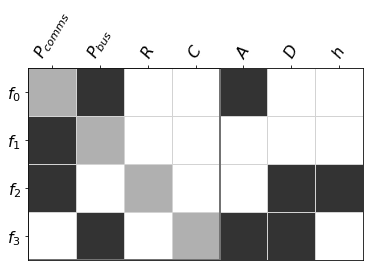

In [14]:
render_incidence(edges, tree, rawvariablename=True);